# Lab assignment: Clustering

* **Author**: Jorge Bris Moreno

**Instructions** 

* Read and work through all tutorial content and do all exercises below

**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook
* The final uploaded version should NOT have any code-errors present
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

# Data Import and Cleaning and Exploration.

This fairly new dataset on Palmer Island Penguins was collected and made available by [Dr. Kristen Gorman](https://pallter.marine.rutgers.edu/) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). 

The datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica. We will perform clustering procedure on this dataset.


# Import libraries and load the dataset

Make sure to drop the rowid column

In [2]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
# import penguins dataset and drop rowid column
penguins = pd.read_csv('penguins.csv')
penguins = penguins.drop(columns=['rowid'])
print(penguins.columns)
print(penguins.head(3))

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  


# Perform Exploteratory Data Analysis

Following steps are required for any data analysis project:

## Check the number of rows and columns in the dataset

In [4]:
# get the number of rows and columns
print(penguins.shape)

(344, 8)


## Get the data types of the columns

In [5]:
# get column information
print(penguins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None


## Check for missing values

In [6]:
# check for missing values
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


## Check unique values for categorical columns. For a unusual data value make sure to replace it with the most frequent value (for categorical columns), and with the mean value (for numerical columns)

There are a lot of missing values in `sex` column, make a conscious decision on how to handle them. Write two+ lines on what procedure and logic you used to make that decision. For example, you can write, "I chose to replace values for Adelie penguins on Torgersen island to be all male (or x% male and (1-x)% female)... I chose this procedure because number of penguins male penguins were underrepresented (a usual ratio is for mammels is around 55% female and 45% males)"replace the missing values with the most frequent value in the column.

In [7]:
# get y labels
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

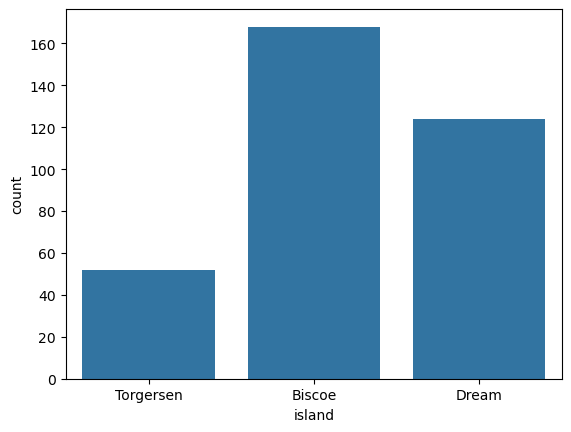

In [8]:
# plot number of penguins on each island
sns.countplot(x="island", data=penguins)
plt.show()


In [9]:
# get sex labels
penguins["sex"].unique()

array(['male', 'female', nan], dtype=object)

<Axes: xlabel='sex', ylabel='count'>

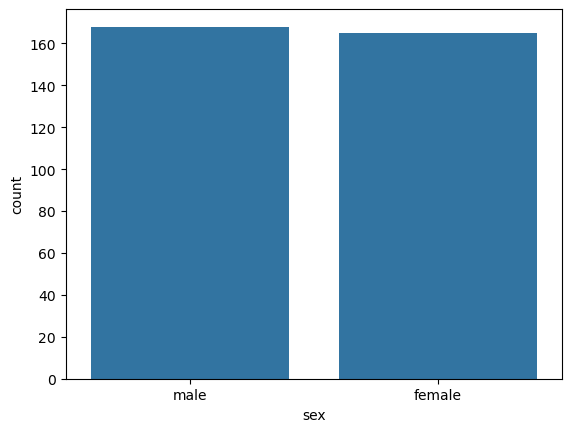

In [10]:
# plot number of penguins by sex
sns.countplot(x='sex', data=penguins)

In [11]:
# get species labels
penguins["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

<Axes: xlabel='species', ylabel='count'>

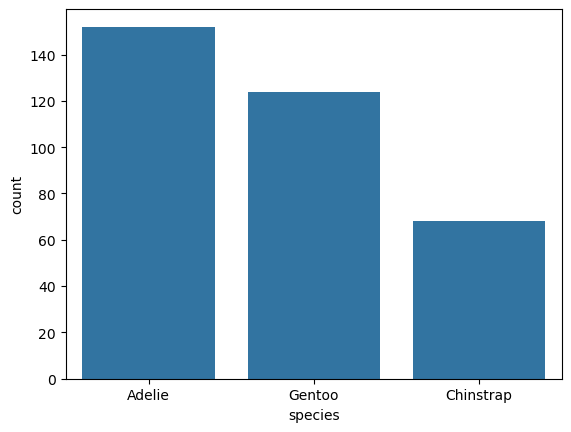

In [12]:
# plot number of penguins by species
sns.countplot(x='species', data=penguins)

<Axes: xlabel='sex', ylabel='count'>

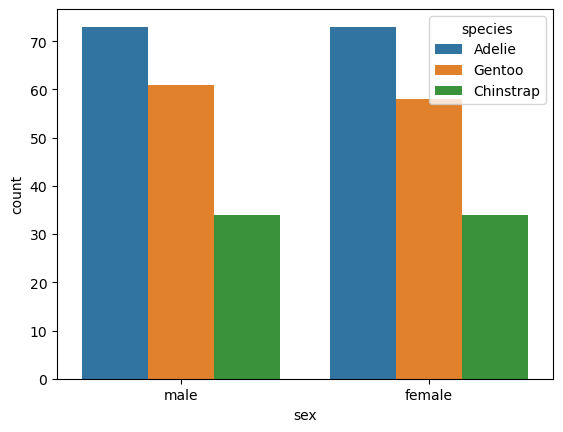

In [13]:
# get number of penguins by species and sex
sns.countplot(x='sex', data=penguins, hue="species")

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

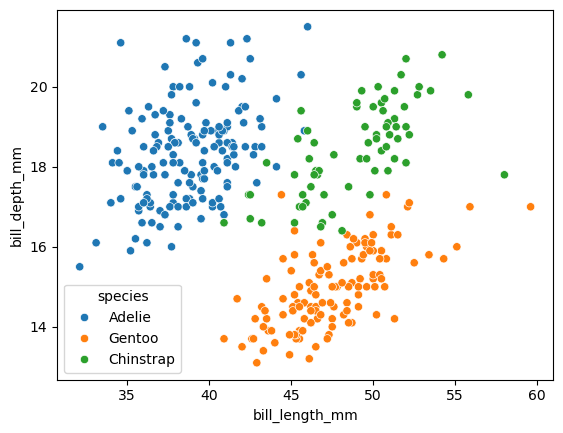

In [14]:
# plot  bill length vs bill depth and color by species
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins, hue='species')

In [15]:
# check for NaN values for sex
penguins[penguins['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [16]:
# check for Nan values for bill_length_mm
penguins[penguins['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [17]:
# check for Nan values for bill_depth_mm
penguins[penguins['bill_depth_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [18]:
# check for Nan values for flipper_length_mm
penguins[penguins['flipper_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [19]:
# check for Nan values for body_mass_g
penguins[penguins['body_mass_g'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [20]:
# Replace continuous missing values with mean of the column. check for Nan values again.
penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean(), inplace=True)
penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean(), inplace=True)
penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean(), inplace=True)
penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean(), inplace=True)
penguins.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

In [21]:
# Replace categorical missing values with mode of the column. check for Nan values again.
penguins['sex'].fillna(penguins['sex'].mode().iloc[0], inplace=True)
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [22]:
# Replace categorical values with category codes by using the cat.codes function. you can either replace them in place or create a new column. show the altered dataframe again by using head() 
penguins['island'] = penguins['island'].astype('category')
penguins['island'] = penguins['island'].cat.codes
penguins['species'] = penguins['species'].astype('category')
penguins['species'] = penguins['species'].cat.codes
penguins['sex'] = penguins['sex'].astype('category')
penguins['sex'] = penguins['sex'].cat.codes
print(penguins.head())

   species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       2        39.10000       18.70000         181.000000   
1        0       2        39.50000       17.40000         186.000000   
2        0       2        40.30000       18.00000         195.000000   
3        0       2        43.92193       17.15117         200.915205   
4        0       2        36.70000       19.30000         193.000000   

   body_mass_g  sex  year  
0  3750.000000    1  2007  
1  3800.000000    0  2007  
2  3250.000000    0  2007  
3  4201.754386    1  2007  
4  3450.000000    0  2007  


# Seperate the dataset into features and labels

In [23]:
# Split the dataset in X and y. since this is unsupervised learning, we will not use the y labels. you can choose to normalize the X data by using the StandardScaler function.
from sklearn.preprocessing import StandardScaler
import pandas as pd

x = penguins.drop(['species'], axis=1)
y = penguins[['species']]

scaler = StandardScaler()

X = scaler.fit_transform(x)

# Perform K-means

In [24]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances, silhouette_score


In [25]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib.
X_reshaped = X

inertia_values = []
distortion_values = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reshaped)
    inertia_values.append(kmeans.inertia_)
    cluster_assignments = kmeans.predict(X_reshaped)
    centers = kmeans.cluster_centers_
    distortion = sum(np.min(pairwise_distances(X_reshaped, centers, metric='euclidean'), axis=1)) / X_reshaped.shape[0]
    distortion_values.append(distortion)

penguins_kmeans_df = pd.DataFrame({'Clusters': range(1, 11), 'Distortion': distortion_values, 'Inertia': inertia_values})

print(penguins_kmeans_df)

   Clusters  Distortion      Inertia
0         1    2.600360  2408.000000
1         2    2.001769  1443.084803
2         3    1.769736  1134.338061
3         4    1.571340   943.538002
4         5    1.491720   847.025238
5         6    1.409156   756.661676
6         7    1.337702   679.307909
7         8    1.286930   630.413932
8         9    1.241734   587.458602
9        10    1.181949   535.674473


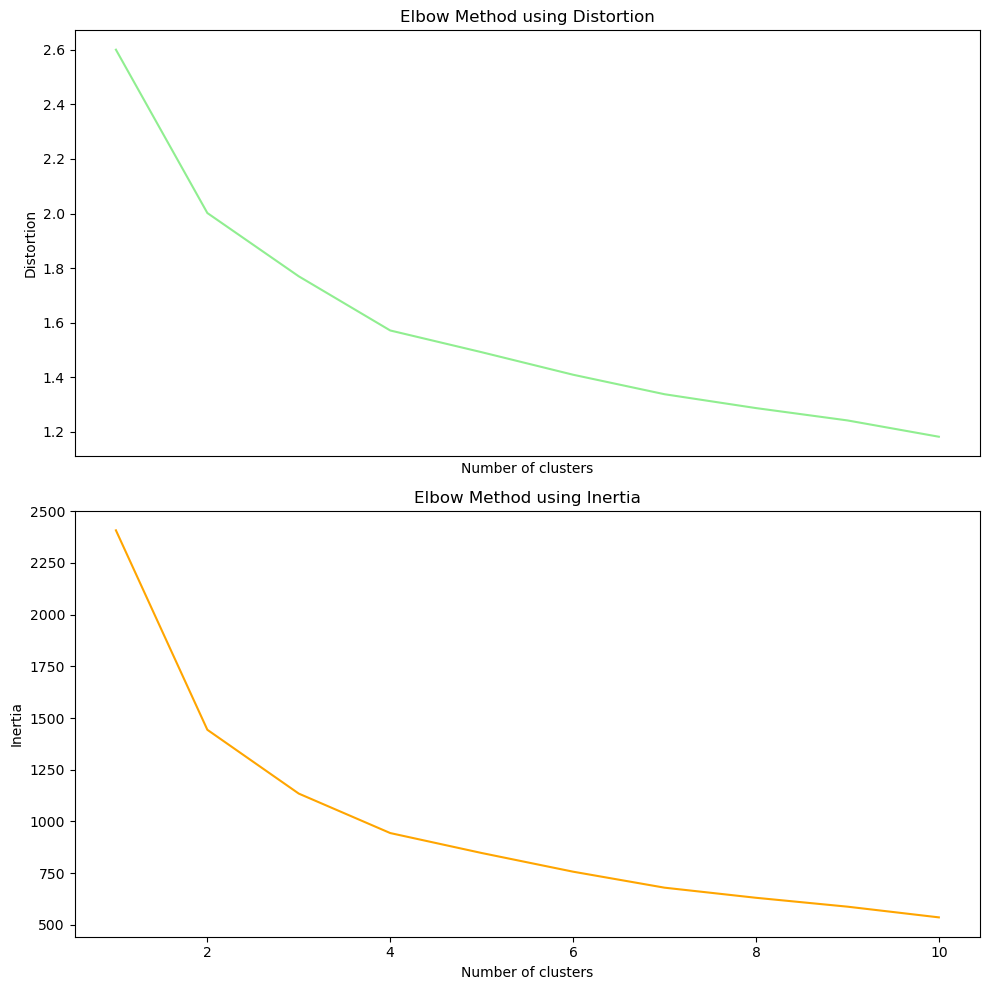

In [26]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot Distortion
axs[0].plot(penguins_kmeans_df['Clusters'], penguins_kmeans_df['Distortion'], marker='', linestyle='-', color='lightgreen')
axs[0].set_title('Elbow Method using Distortion')
axs[0].set_ylabel('Distortion')
axs[0].set_xlabel('Number of clusters')
axs[0].set_xticks([])

# Plot Inertia
axs[1].plot(penguins_kmeans_df['Clusters'], penguins_kmeans_df['Inertia'], marker='', linestyle='-', color='orange')
axs[1].set_title('Elbow Method using Inertia')
axs[1].set_ylabel('Inertia')
axs[1].set_xlabel('Number of clusters')

plt.tight_layout()
plt.show()

# Perform DBSCAN and predict the labels

In [27]:
model = DBSCAN(eps=.7, min_samples=15)
preds = model.fit_predict(X)

In [28]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.

from sklearn.metrics import silhouette_score
import random

random.seed(42)
clus = []
eps = []
sil = []
z =[i/10 for i in range(5,20)]
z2 = range(2,10)

for i in z:
    for j in z2:
        model = DBSCAN(eps=i, min_samples=j)
        predics = model.fit_predict(X)
        eps.append(i)
        sil.append(silhouette_score(X, predics))
        clus.append(len(pd.Series(predics).unique()))
    

db = pd.DataFrame({'Clusters': clus, 'Eps': eps, 'Silhouette': sil})
print(db)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [28]:
from sklearn.metrics import silhouette_score
import random

random.seed(42)
clus = []
eps = []
sil = []
z = [i / 10 for i in range(5, 20)]
z2 = range(2, 10)

for i in z:
    for j in z2:
        model = DBSCAN(eps=i, min_samples=j)
        predics = model.fit_predict(X)
        eps.append(i)
        clus.append(len(pd.Series(predics).unique()))
        if len(pd.Series(predics).unique()) > 1:
            sil.append(silhouette_score(X, predics))
        else:
            sil.append(None)

db = pd.DataFrame({'Clusters': clus, 'Eps': eps, 'Silhouette': sil})
print(db)



     Clusters  Eps  Silhouette
0          46  0.5   -0.062055
1          22  0.5   -0.124610
2          13  0.5   -0.171987
3           9  0.5   -0.153732
4           6  0.5   -0.050449
..        ...  ...         ...
115         3  1.9    0.172905
116         3  1.9    0.172905
117         3  1.9    0.172905
118         3  1.9    0.172905
119         3  1.9    0.172905

[120 rows x 3 columns]


In [29]:
from sklearn.metrics import silhouette_score
import random

random.seed(42)
best_scores = []
epsilons = []
clusters = []
z = [i / 10 for i in range(5, 20)]
z2 = range(2, 10)

for i in z:
    max_score = -1
    best_cluster = -1
    best_eps = -1
    for j in z2:
        model = DBSCAN(eps=i, min_samples=j)
        predics = model.fit_predict(X)
        num_clusters = len(pd.Series(predics).unique())
        if num_clusters > 1:
            score = silhouette_score(X, predics)
            if score > max_score:
                max_score = score
                best_cluster = num_clusters
                best_eps = i

    best_scores.append(max_score)
    clusters.append(best_cluster)
    epsilons.append(best_eps)

db = pd.DataFrame({'Epsilons': epsilons, 'Best_Clusters': clusters, 'Best_Silhouette': best_scores})
print(db)


    Epsilons  Best_Clusters  Best_Silhouette
0        0.5              3        -0.044395
1        0.6             42         0.098304
2        0.7             50         0.222303
3        0.8             44         0.275869
4        0.9             38         0.300626
5        1.0             30         0.323976
6        1.1             30         0.330970
7        1.2             28         0.328950
8        1.3             11         0.281802
9        1.4              6         0.281681
10       1.5              5         0.328607
11       1.6              5         0.328607
12       1.7              4         0.218562
13       1.8              3         0.172905
14       1.9              3         0.172905


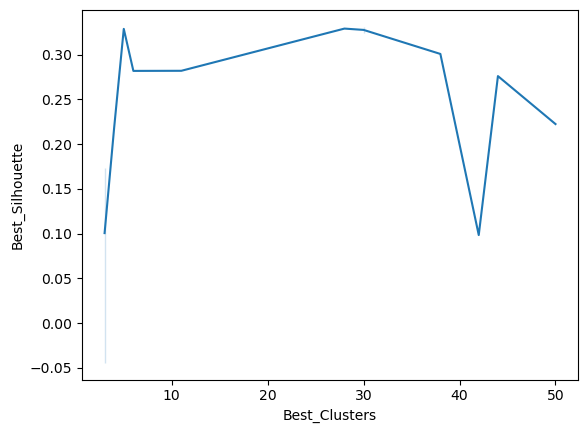

In [30]:
sns.lineplot(data=db, x='Best_Clusters',y='Best_Silhouette')
plt.show()

<Axes: xlabel='Eps', ylabel='Silhouette'>

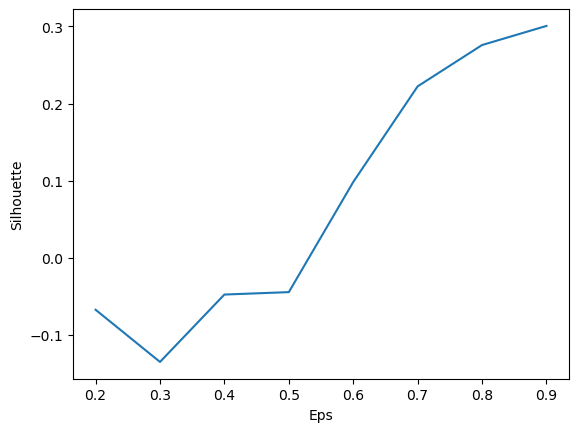

In [29]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_silhouette = -1
best_eps = 0.5
best_min_samples = 2

z1 = [i / 10 for i in range(2, 10)]
z2 = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_silhouettes = []  # List to store best silhouette scores

for i in z1:
    best_silhouette_for_eps = -1  # Initialize best silhouette for the current eps
    for j in z2:
        model = DBSCAN(eps=i, min_samples=j)
        labels = model.fit_predict(X)
        if len(set(labels)) > 1 and -1 in labels:
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if num_clusters > 10:
                num_clusters = 10
            score = silhouette_score(X, labels)
            if score > best_silhouette_for_eps:
                best_silhouette_for_eps = score
                best_eps = i
                best_min_samples = j
    best_silhouettes.append(best_silhouette_for_eps)  # Append the best silhouette for the current eps

# Create a DataFrame to store the results
df = pd.DataFrame({'Eps': z1, 'Silhouette': best_silhouettes})

# Plot the best silhouette for each eps value
sns.lineplot(data=df, x='Eps', y='Silhouette')


# Agglomerative Clustering (Hierarchical clustering)

In [197]:
# Perform Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') #chose 3 as that is the number of species. We could have changed it.
labels = hierarchical_cluster.fit_predict(X_reshaped)
print("Cluster Labels total:")
print(list(set(labels)))


Cluster Labels total:
[0, 1, 2]
AgglomerativeClustering(affinity='euclidean', n_clusters=3)


/Users/jorgebrismoreno/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


 ### Plot the clusters for Agglomerative Clustering

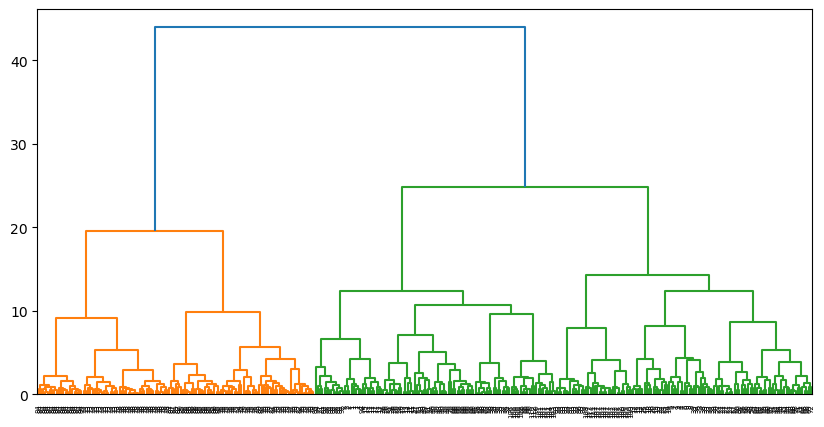

In [295]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.

linkage_matrix = linkage(X_reshaped, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', labels=labels, distance_sort='ascending', show_leaf_counts=True)
plt.show()

# Mean Shift

In [32]:
# Perform MeanShift Clustering and predict number 
clustering_meanshift = MeanShift(bandwidth=2, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)
clustering_meanshift.fit(X_reshaped)
predics = clustering_meanshift.predict(X_reshaped)
print('Number of estimated clusters : ', len(np.unique(predics)))

Number of estimated clusters :  5


 ### Plot the clusters for Mean Shift Clustering

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

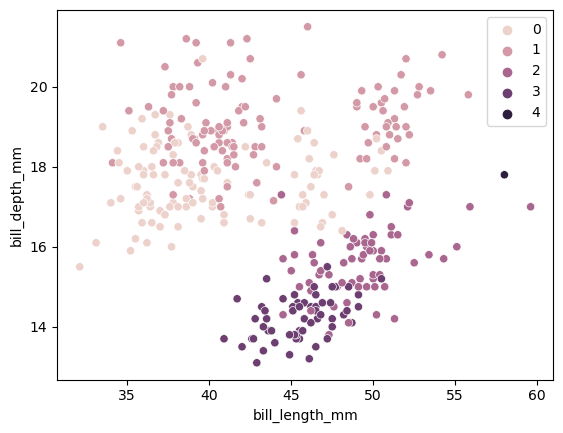

In [326]:
# Plot the clusters for Mean Shift Clustering
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue=predics, data=penguins)

# Birch

OPTIMAL PARAMETER = 2


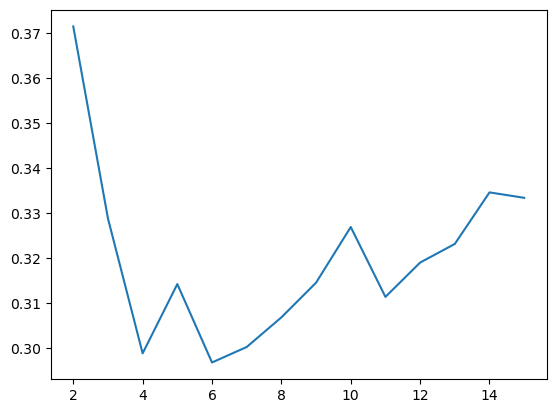

In [37]:
import sklearn.cluster
# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH)
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X)

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)
        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue

        if(i_print): print(param,sil_scores[-1])

        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels
    plt.plot(params,sil_scores)
    print("OPTIMAL PARAMETER =",opt_param)

    return opt_labels
opt_labels=maximize_silhouette(X,algo="birch",nmax=15, i_plot=True)